In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 这个notebook在预处理数据

做了以下几件事情：

- 读数据进来，每个feature看一下分布
- 连续型feature归一化，看一下correlation
- 离散型feature不知道怎么预处理，就没处理，然后看一下correlation
  - 可能可以用TF-IDF做一下，onehot是肯定不行的
- 输出到文件red_processed.csv

In [2]:
train_red = pd.read_csv('data/winequality-red.csv', sep=';')
train_red.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [3]:
train_red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
continuous_features = ["fixed acidity", "volatile acidity", "citric acid", "residual sugar", "chlorides", "density", "pH", "sulphates", "alcohol"]
class_features = ["free sulfur dioxide", "total sulfur dioxide"]
target_feature = "quality"

In [5]:
def plot_continuous(df, feature_name):
    sns.displot(data=df, x=feature_name)

In [6]:
def plot_class(df, feature_name):
    sns.displot(data=df, x=feature_name)

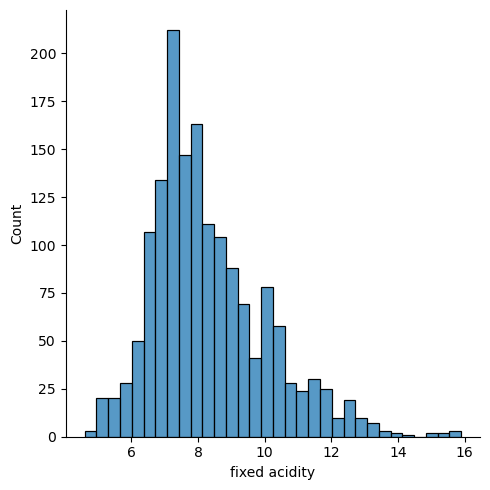

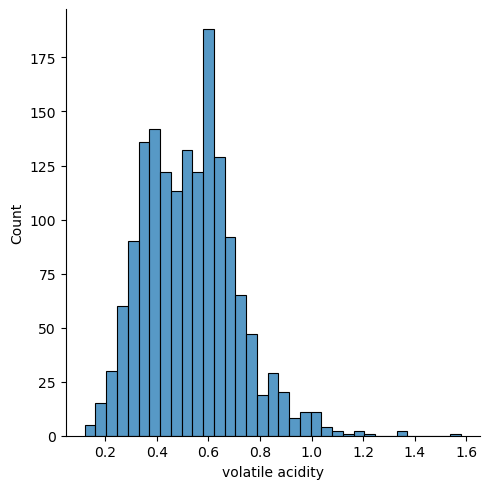

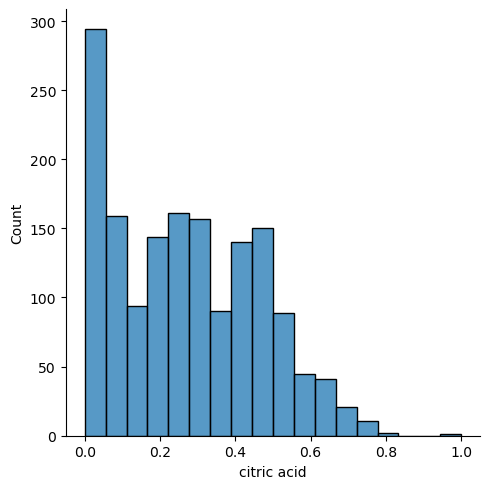

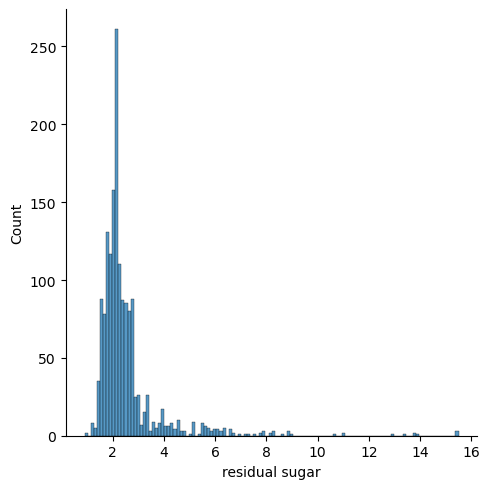

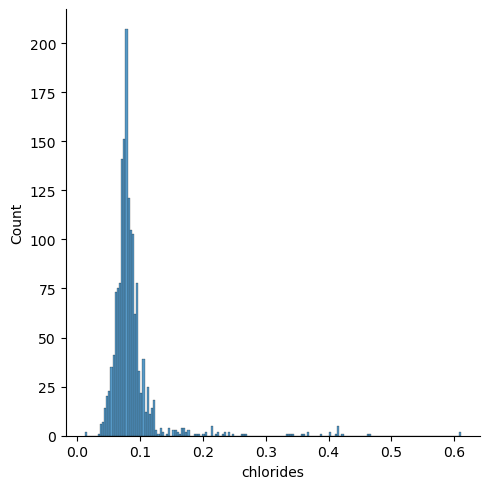

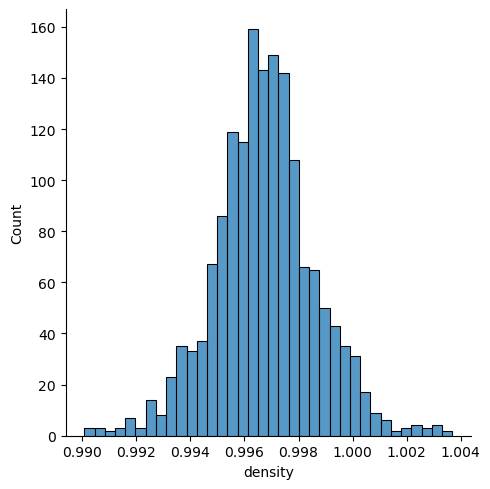

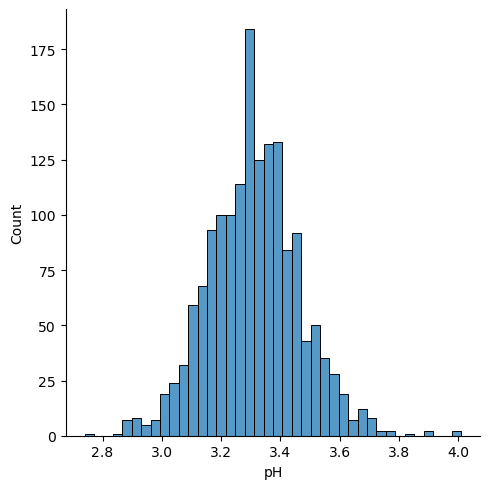

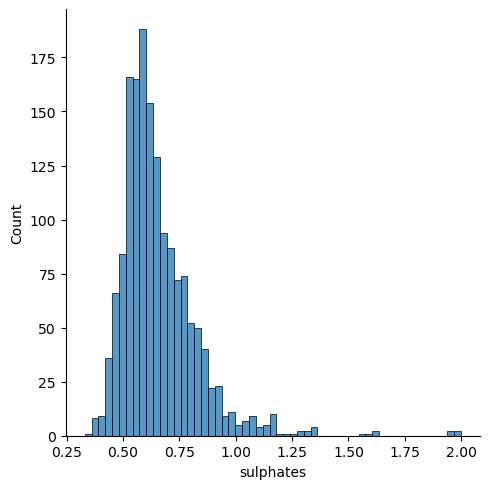

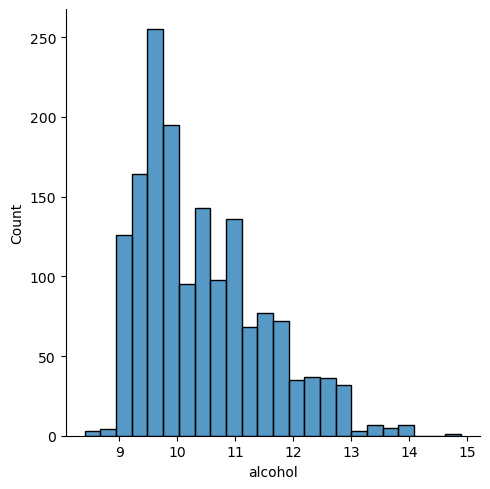

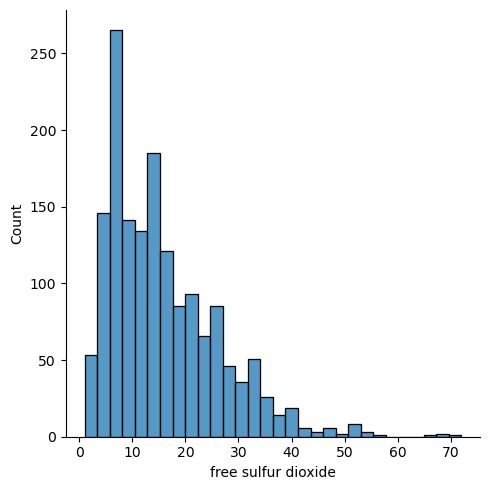

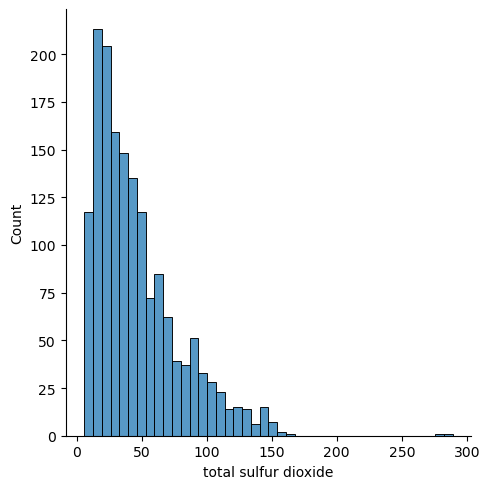

In [7]:
for feature_name in continuous_features:
    plot_continuous(train_red, feature_name)
for feature_name in class_features:
    plot_class(train_red, feature_name)

In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(train_red[continuous_features])
train_red[continuous_features] = scaler.transform(train_red[continuous_features])
train_red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,11.0,34.0,0.558274,1.288643,-0.579207,-0.960246,5
1,-0.298547,1.967442,-1.391472,0.043416,0.223875,25.0,67.0,0.028261,-0.719933,0.128950,-0.584777,5
2,-0.298547,1.297065,-1.186070,-0.169427,0.096353,15.0,54.0,0.134264,-0.331177,-0.048089,-0.584777,5
3,1.654856,-1.384443,1.484154,-0.453218,-0.264960,17.0,60.0,0.664277,-0.979104,-0.461180,-0.584777,6
4,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,11.0,34.0,0.558274,1.288643,-0.579207,-0.960246,5


In [9]:
corr = train_red[continuous_features].corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

/tmp/ipykernel_523110/549862186.py:2: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  corr.style.background_gradient(cmap='coolwarm').set_precision(2)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,density,pH,sulphates,alcohol
fixed acidity,1.00,-0.26,0.67,0.11,0.09,0.67,-0.68,0.18,-0.06
volatile acidity,-0.26,1.00,-0.55,0.00,0.06,0.02,0.23,-0.26,-0.20
citric acid,0.67,-0.55,1.00,0.14,0.20,0.36,-0.54,0.31,0.11
residual sugar,0.11,0.00,0.14,1.00,0.06,0.36,-0.09,0.01,0.04
chlorides,0.09,0.06,0.20,0.06,1.00,0.20,-0.27,0.37,-0.22
density,0.67,0.02,0.36,0.36,0.20,1.00,-0.34,0.15,-0.50
pH,-0.68,0.23,-0.54,-0.09,-0.27,-0.34,1.00,-0.20,0.21
sulphates,0.18,-0.26,0.31,0.01,0.37,0.15,-0.20,1.00,0.09
alcohol,-0.06,-0.20,0.11,0.04,-0.22,-0.50,0.21,0.09,1.00


In [15]:
# from sklearn.feature_extraction.text import TfidfTransformer
# v = TfidfTransformer()
# for feature in class_features:
#     train_red[feature] = v.fit_transform(train_red[feature].to_ndarray().reshape(-1, 1))
# train_red[class_features] = v.fit_transform(train_red[class_features])

AttributeError: 'Series' object has no attribute 'to_ndarray'

In [16]:
corr = train_red[class_features].corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

/tmp/ipykernel_523110/56201277.py:2: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  corr.style.background_gradient(cmap='coolwarm').set_precision(2)


,free sulfur dioxide,total sulfur dioxide
free sulfur dioxide,1.00,0.67
total sulfur dioxide,0.67,1.00


In [17]:
train_red.to_csv("data/red_processed.csv", index=False)